In [16]:
import cv2
import dlib
import os
import time
import numpy as np

def resize_image(image: np.ndarray, max_size: int = 800) -> np.ndarray:
    """
    Resize the image while maintaining aspect ratio, so that the maximum dimension is not greater than max_size.
    
    Args:
        image (numpy.ndarray): Input image.
        max_size (int): Maximum size for the larger dimension after resizing. Default is 800.

    Returns:
        numpy.ndarray: Resized image.
    """
    height, width = image.shape[:2]
    if max(height, width) > max_size:
        if height > width:
            new_height = max_size
            new_width = int(width * (max_size / height))
        else:
            new_width = max_size
            new_height = int(height * (max_size / width))
        image = cv2.resize(image, (new_width, new_height))
    return image

def dlib_cnn_detect_faces(source_folder: str, destination_folder: str, model_path: str) -> None:
    """
    Detect faces using DLIB's CNN face detector and save bounding boxes to text files.
    
    Args:
        source_folder (str): Path to the source directory containing image files.
        destination_folder (str): Path to the destination directory where processed images and labels will be saved.
        model_path (str): Path to the pre-trained model for face detection.
    """
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    
    # Ensure the destination folders exist
    images_folder = os.path.join(destination_folder, "images")
    labels_folder = os.path.join(destination_folder, "labels")
    if not os.path.exists(images_folder):
        os.makedirs(images_folder)
    if not os.path.exists(labels_folder):
        os.makedirs(labels_folder)
    
    # Load the CNN face detector
    cnn_detector = dlib.cnn_face_detection_model_v1(model_path)
    
    # Iterate through all files in the source directory
    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(source_folder, filename)
            
            # Load the image
            image = cv2.imread(file_path)
            
            # Resize the image while maintaining aspect ratio
            image = resize_image(image)
            
            # Record start time
            start = time.time()
            
            # Perform face detection
            detections = cnn_detector(image, 2)
            
            for i, face in enumerate(detections):
                l, t, r, b = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom()
                
                # Ensure x1, y1, x2, y2 format
                x1, y1, x2, y2 = min(l, r), min(t, b), max(l, r), max(t, b)
                
                # Draw bounding boxes for each detected face
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                
                # Save bounding box coordinates to a text file
                label_file_path = os.path.join(labels_folder, f"{os.path.splitext(filename)[0]}.txt")
                with open(label_file_path, 'w') as label_file:
                    label_file.write(f"{x1} {y1} {x2} {y2}\n")
            
            # Record end time
            end = time.time()
            
            print(f"Processed {filename} in {end - start:.2f} seconds.")
            
            # Save the processed image to the images folder
            output_image_path = os.path.join(images_folder, filename)
            cv2.imwrite(output_image_path, image)
    print("Processing complete.")


In [17]:
source_folder = "/Users/jocareher/Downloads/benchmark_test/images"
destination_folder = "/Users/jocareher/Downloads/dlib_predictions"
model_path = "/Users/jocareher/Library/CloudStorage/OneDrive-Personal/Educación/eLearning/Face_Detection/Weights/mmod_human_face_detector.dat"
dlib_cnn_detect_faces(source_folder=source_folder,
                      destination_folder=destination_folder,
                      model_path=model_path)

Processed face_img_481.jpg in 5.94 seconds.
Processed flip_face_img_2180.jpg in 3.01 seconds.
Processed face_img_1214.jpg in 4.06 seconds.
Processed face_img_3371.jpg in 3.68 seconds.
Processed face_img_7117.jpg in 3.27 seconds.
Processed face_img_6584.jpg in 6.05 seconds.
Processed face_img_2090.jpg in 2.65 seconds.
Processed flip_face_img_2631.jpg in 4.97 seconds.
Processed flip_face_bcn_15.jpg in 4.76 seconds.
Processed face_img_697.jpg in 2.69 seconds.
Processed flip_face_img_65.jpg in 3.10 seconds.
Processed face_img_7329.jpg in 4.39 seconds.
Processed face_img_6779.jpg in 3.48 seconds.
Processed face_img_1002.jpg in 4.15 seconds.
Processed face_img_6786.jpg in 3.25 seconds.
Processed face_img_6976.jpg in 3.46 seconds.
Processed flip_face_img_548.jpg in 3.49 seconds.
Processed face_img_2494.jpg in 6.89 seconds.
Processed face_img_2480.jpg in 4.26 seconds.
Processed face_img_720.jpg in 3.47 seconds.
Processed face_bcn_316.jpg in 4.78 seconds.
Processed flip_face_img_4485.jpg in 3.1

(201, 189, 323, 311)

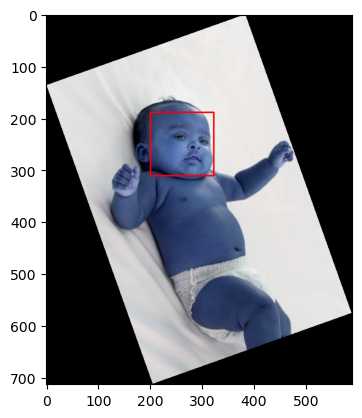

In [12]:
import matplotlib.pyplot as plt
im = cv2.imread("/Users/jocareher/Downloads/benchmark_test/images/face_img_481.jpg")
draw = cv2.rectangle(im, (201, 189), (323, 311), (255, 0, 0), 2)
plt.imshow(draw)